In [3]:
from haven import haven_jupyter as hj

hj.init_datatable_mode()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

In [26]:
# loss_func = 'logistic_loss'
loss_func = 'squared_hinge_loss'
runs = 0
# filterby_list = [
#                                      {'opt':{'name':"adam"}, 'loss_func':loss_func, 'runs':runs},
#                                      {'opt':{'name':"adagrad"},'loss_func':loss_func, 'runs':runs}, 
#                                      {'opt':{'name':"svrg"},'loss_func':loss_func, 'runs':runs},
#                                      {'batch_size':100, 'batch_grow_factor':None, 'opt':{'name':"ssn"},'loss_func':loss_func, 'runs':runs}, 
#                                      {'batch_size':100, 'batch_grow_factor':1.01, 'opt':{'name':"ssn"},'loss_func':loss_func, 'runs':runs}, 
# #                                      {'opt':{'name':"slbfgs"},'loss_func':loss_func, 'runs':0}, 
#                                      {'batch_size':'full', 'opt':{'name':"lbfgs"},'loss_func':loss_func, 'runs':runs}, 
#                                      {'batch_size':'full', 'opt':{'name':'ssn', 'lm':0.},'loss_func':loss_func, 'runs':runs}, 
#                                     ]
filterby_list = [
#                                      {'opt':{'name':"adam"}, 'loss_func':loss_func},
#                                      {'opt':{'name':"adagrad"},'loss_func':loss_func}, 
                                     {'opt':{'name':"svrg"},'loss_func':loss_func},
                                     {'batch_size':100, 'batch_grow_factor':None, 'opt':{'name':"ssn"},'loss_func':loss_func}, 
                                     {'batch_size':100, 'batch_grow_factor':1.01, 'opt':{'name':"ssn"},'loss_func':loss_func}, 
                                     {'opt':{'name':"slbfgs"},'loss_func':loss_func}, 
                                     {'batch_size':'full', 'opt':{'name':"lbfgs"},'loss_func':loss_func}, 
                                     {'batch_size':'full', 'opt':{'name':'ssn', 'lm':0.},'loss_func':loss_func}, 
                                    ]
map_exp_list = [
                                             ({'opt':{'name':'svrg'}}, {'label':'SVRG', 'markevery':10, 'color':'blue'}),
                                             ({'opt':{'name':'adam'}}, {'label':'Adam', 'markevery':10, 'color':'orange'}),
                                             ({'opt':{'name':'adagrad'}}, {'label':'Adagrad', 'markevery':10, 'color':'green'}),
                                             ({'batch_size':100, 'batch_grow_factor':None, 'opt':{'name':'ssn'}}, {'label':'R-SSN-const', 'markevery':10, 'color':'red'}),
#                                              ({'batch_size':100, 'batch_grow_factor':1.01, 'opt':{'name':'ssn'}}, {'label':'R-SSN-grow', 'markevery':10, 'color':'purple'}),
                                             ({'opt':{'name':'slbfgs'}}, {'label':'sLBFGS', 'markevery':10, 'color':'teal'}),
                                             ({'opt':{'name':'lbfgs'}}, {'label':'LBFGS', 'markevery':10, 'color':'black'}),
                                             ({'opt':{'name':'ssn', 'lm':0}}, {'label':'Newton', 'markevery':10, 'color':'brown'}),
#                                              ({'opt':{'name':'ssn'}}, {'label':'R-SSN-const', 'markevery':10}),
#                                              ({'opt':{'name':'svrg'}}, {'label':'Newton', 'markevery':10}),
#                                              ({'opt':{'name':'svrg'}}, {'label':'Newton', 'markevery':10})
                                            ]

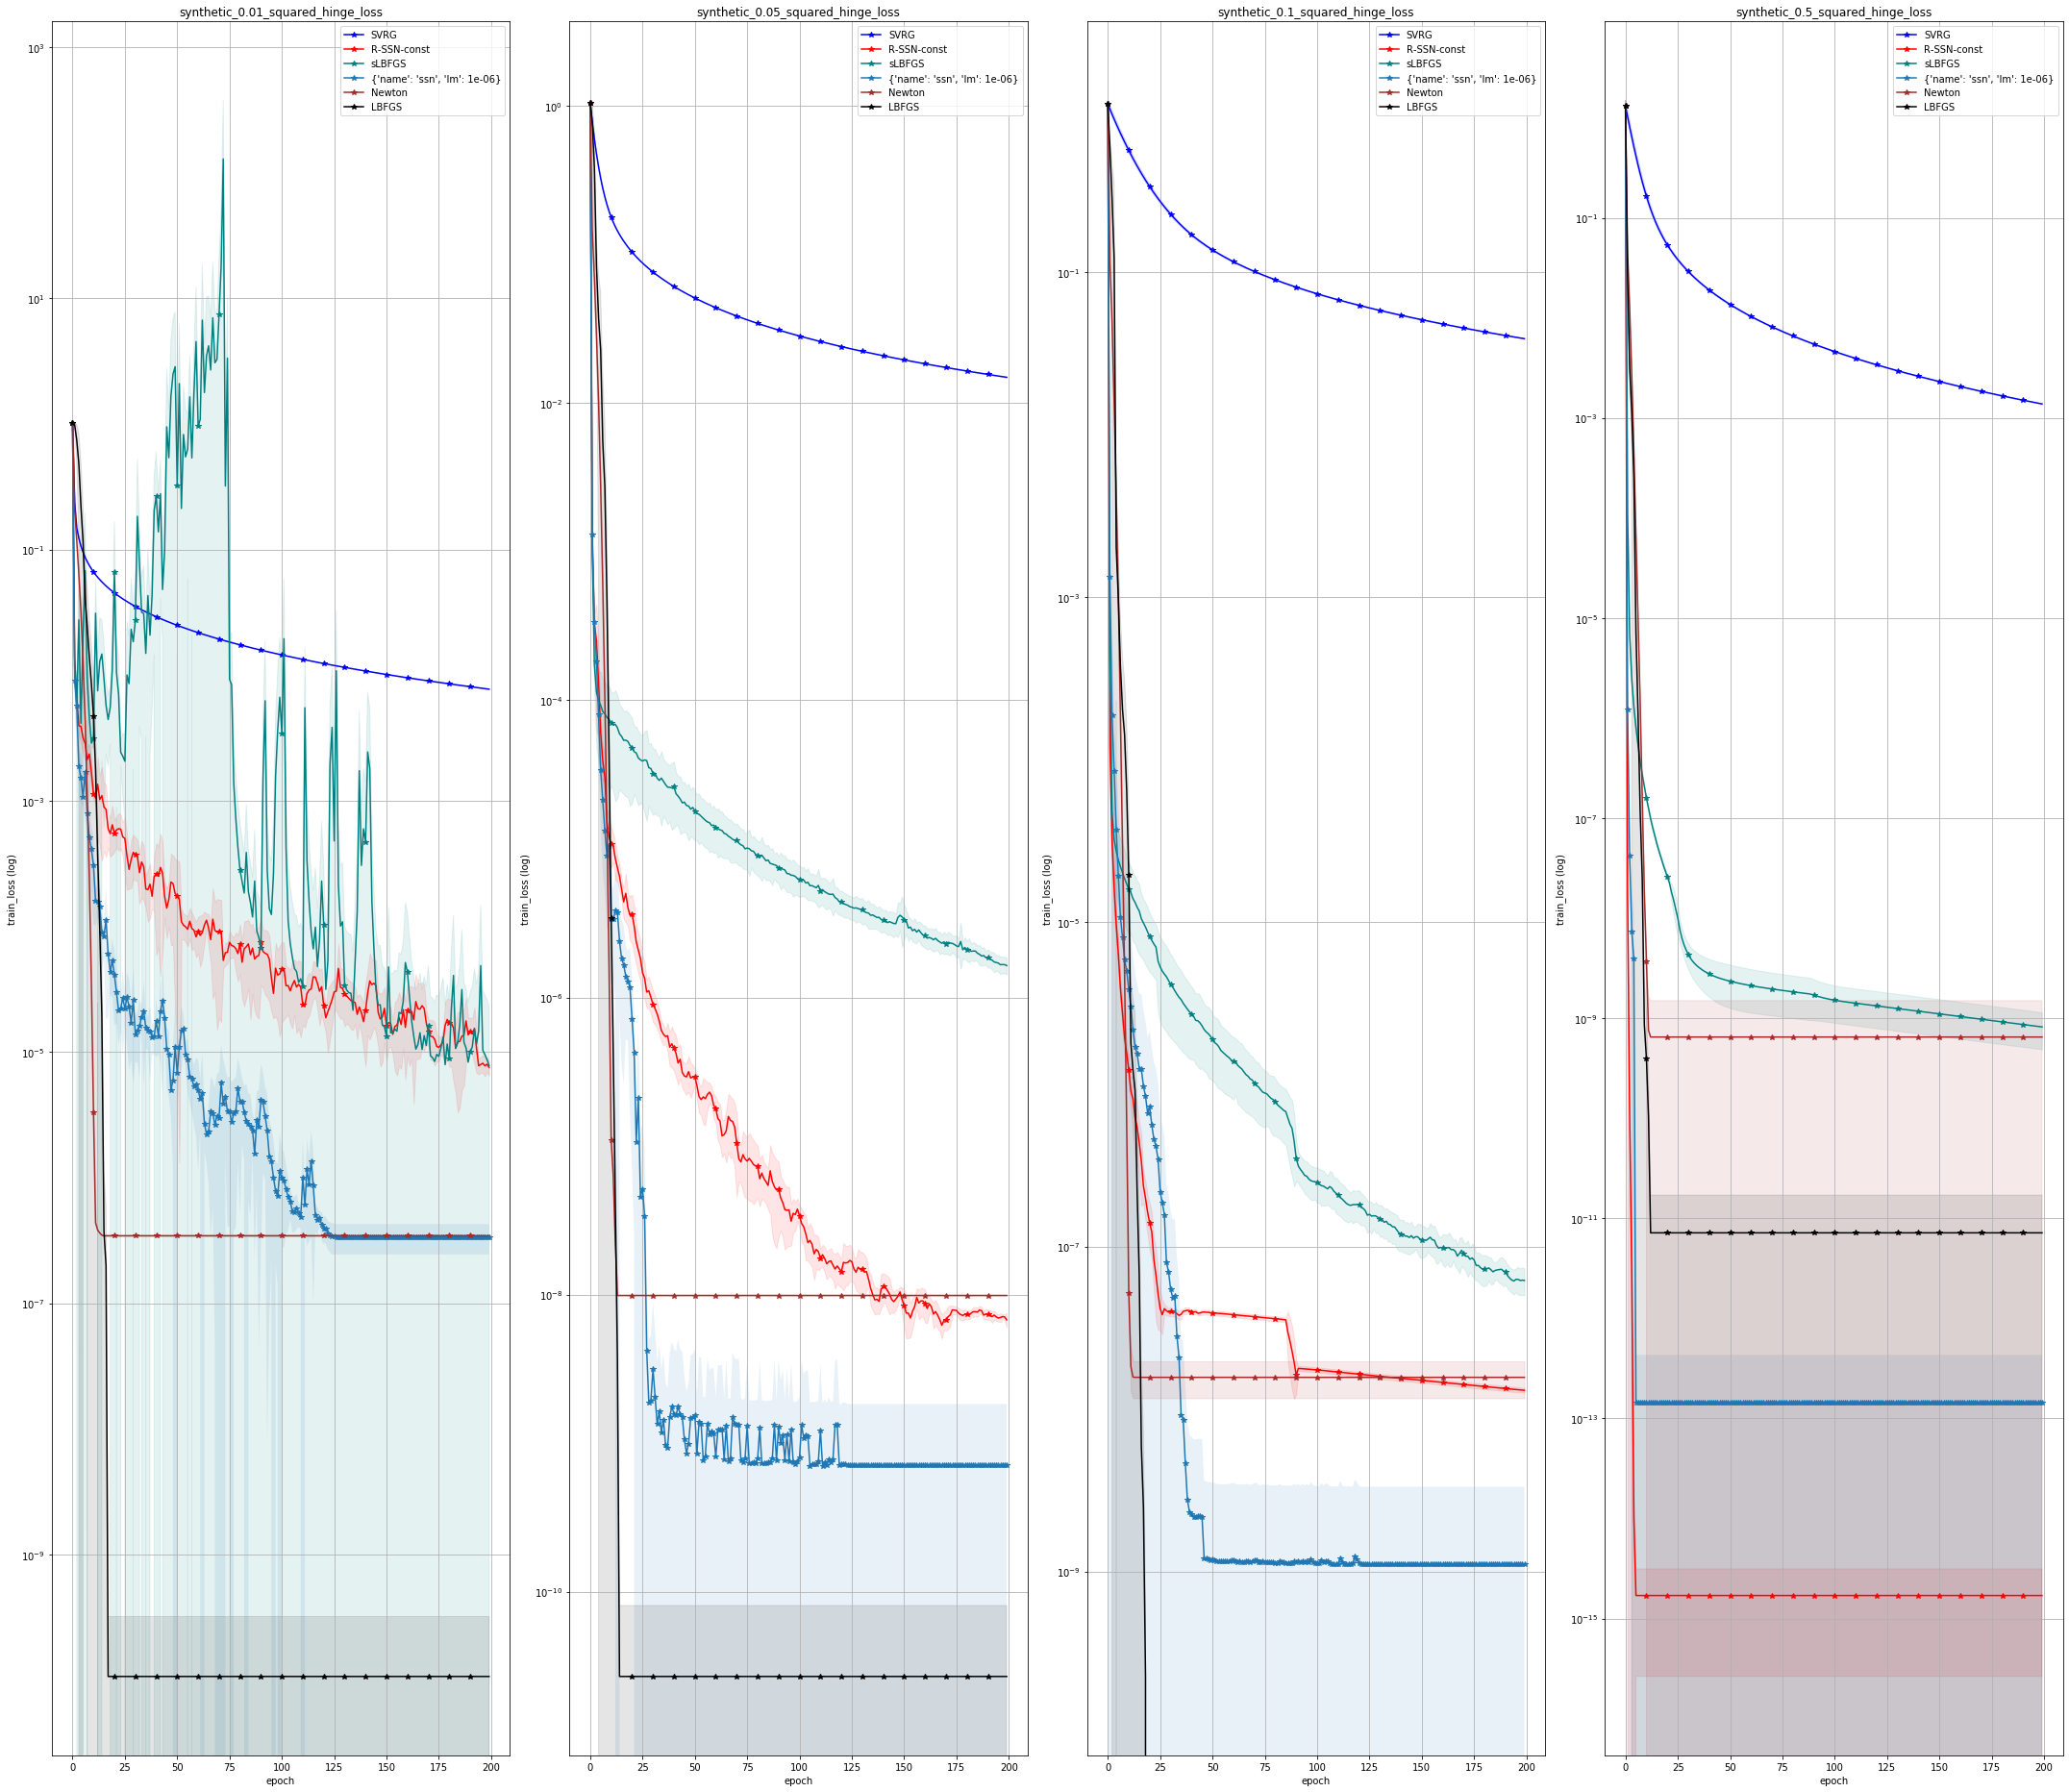

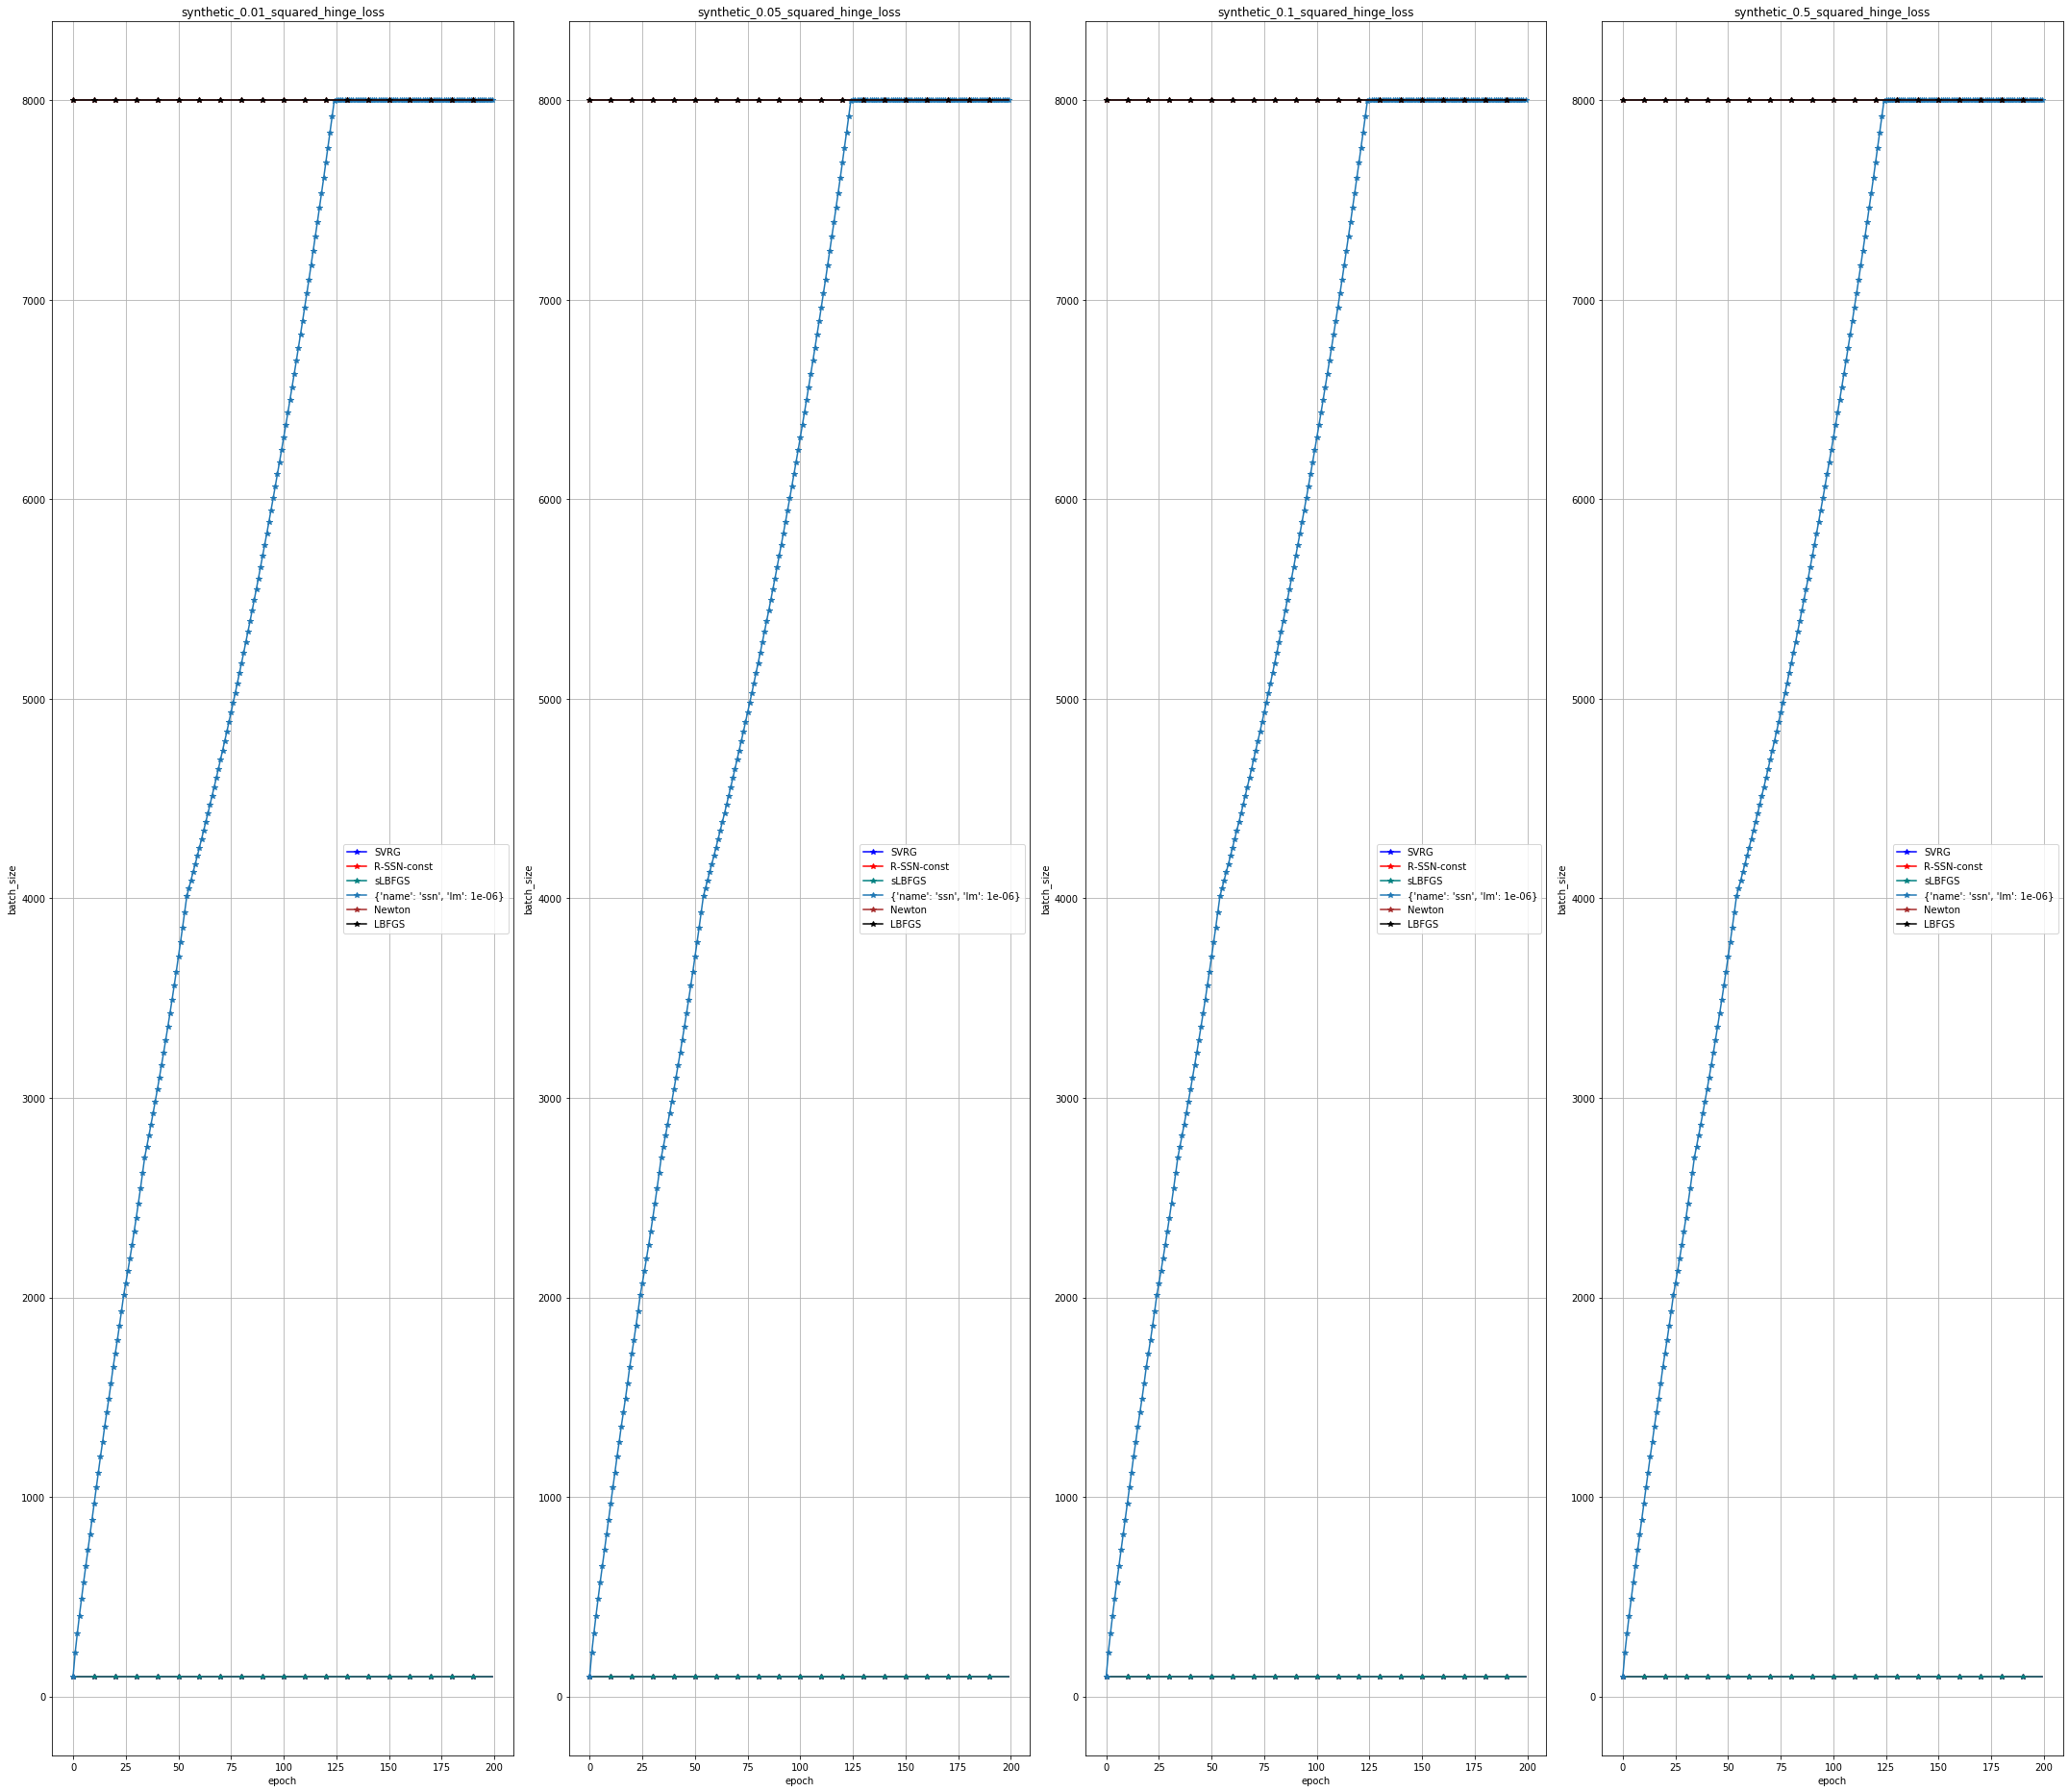

In [31]:
# Figure 1 - syn
from haven import haven_results as hr
savedir_base='/mnt/datasets/public/issam/prototypes/ssn/borgy/'

rm = hr.ResultManager(savedir_base=savedir_base,
                          workdir='/home/issam/Research_Ground/ssn',
                          exp_group_list=[
                              'syn_basic',
                              'syn_grow',
                              'syn_full'
                          ],
                      filterby_list=filterby_list,
                          groupby_list=['dataset', 'margin', 'loss_func'],
                              verbose=0)

# exp_df_list = rm.get_exp_list_df()
# for df in exp_df_list:
#     del df['exp_id']
#     display(df)
#     break
# hr.get_plot(exp_list=rm.exp_groups[0], savedir_base=savedir_base, avg_across='runs', 
#                         y_metric='train_loss', x_metric='epoch', 
#             log_metric_list=['train_loss']
#            )
fig_list = rm.get_plot_all(y_metric_list=['train_loss', 'batch_size'], 
                               order='metrics_by_groups',
                               x_metric='epoch', 
                               figsize=(30,26),
                               log_metric_list=['train_loss'],
                               map_exp_list=map_exp_list,
                               title_list=['dataset', 'margin','loss_func'],
                               legend_list=['opt'], 
                           avg_across='runs'
                          ) 
# rm.get_job_errors()

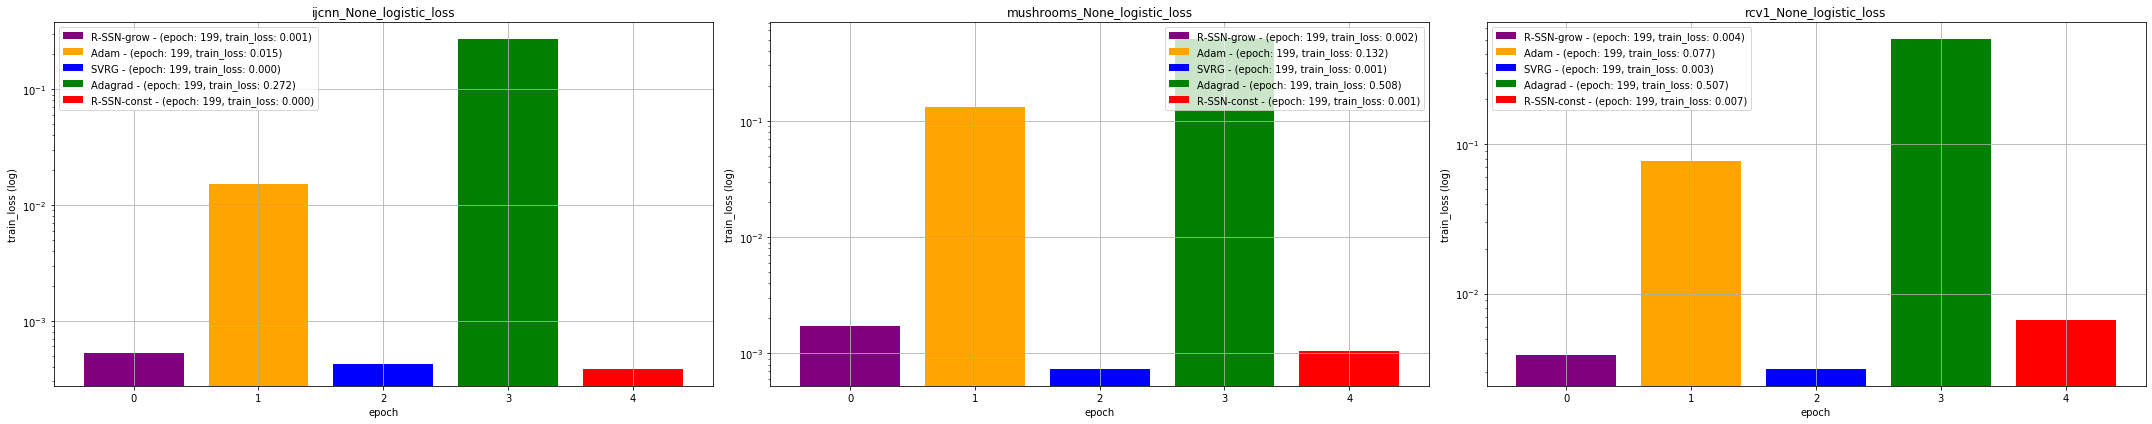

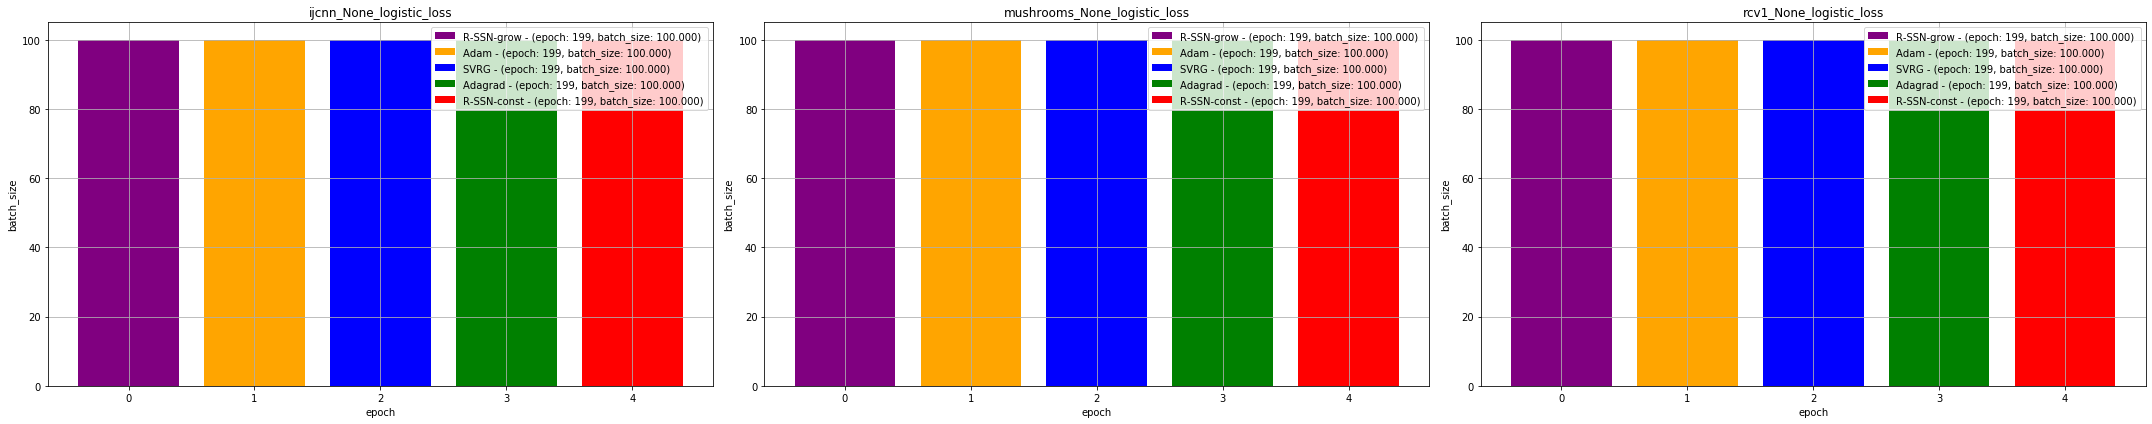

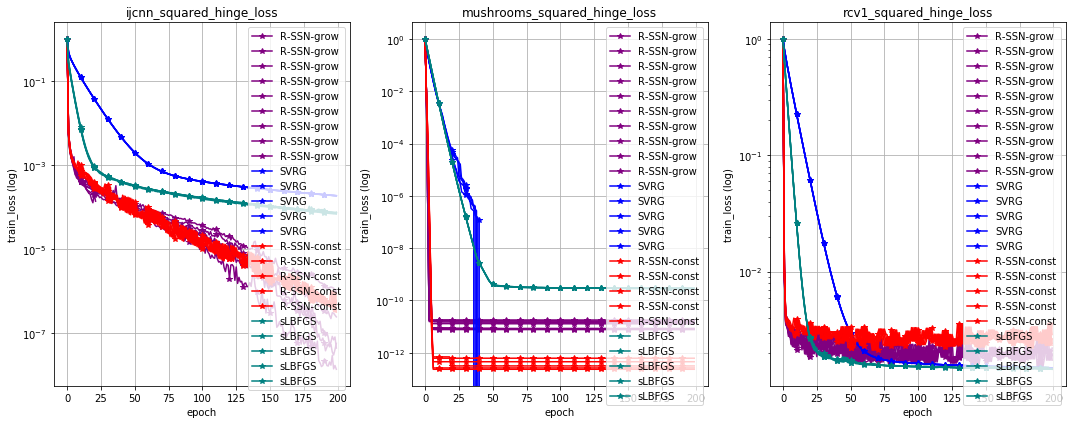

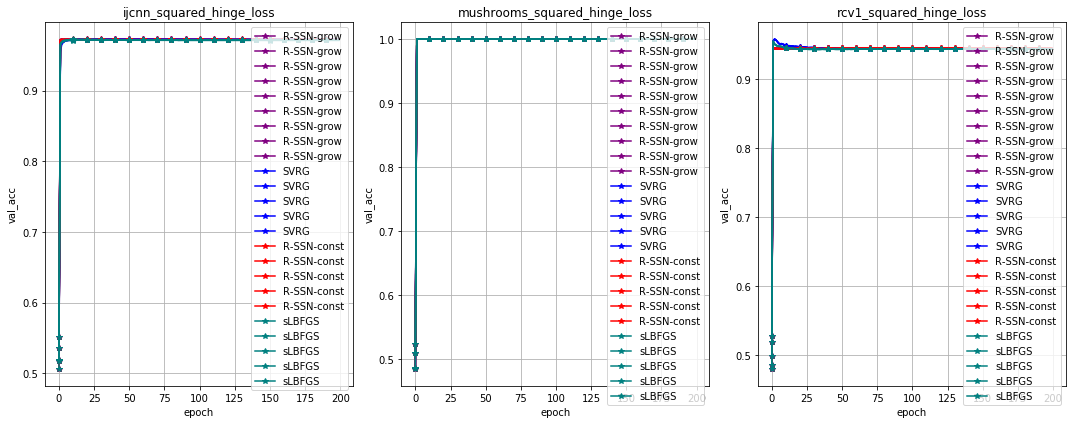

In [144]:
# Figure 2 - kernels
from haven import haven_results as hr
savedir_base='/mnt/datasets/public/issam/prototypes/ssn/borgy/'

# loss_func = 'squared_hinge_loss'
rm = hr.ResultManager(savedir_base=savedir_base,
                          workdir='/home/issam/Research_Ground/ssn',
                          exp_group_list=[
                                         
                                          'kernels_grow',
                               'kernels_basic', 
                          ],
                      filterby_list=filterby_list,
                          groupby_list=['dataset', 'loss_func'],
                              verbose=0)

# exp_df_list = rm.get_exp_list_df()
# for df in exp_df_list:
#     del df['exp_id']
#     display(df)
#     break
# for df in rm.get_score_df():
#     display(df)
#     break
fig_list = rm.get_plot_all(y_metric_list=['train_loss', 'val_acc'], 
                               order='metrics_by_groups',
                               x_metric='epoch', 
                               figsize=(15,6),
                               log_metric_list=['train_loss'],
                               map_exp_list=map_exp_list,
                               title_list=['dataset','loss_func'],
                               legend_list=['opt'], 
#                            avg_across='runs'
                          ) 
# rm.get_job_stats()

[{'SUCCEEDED': 160}]


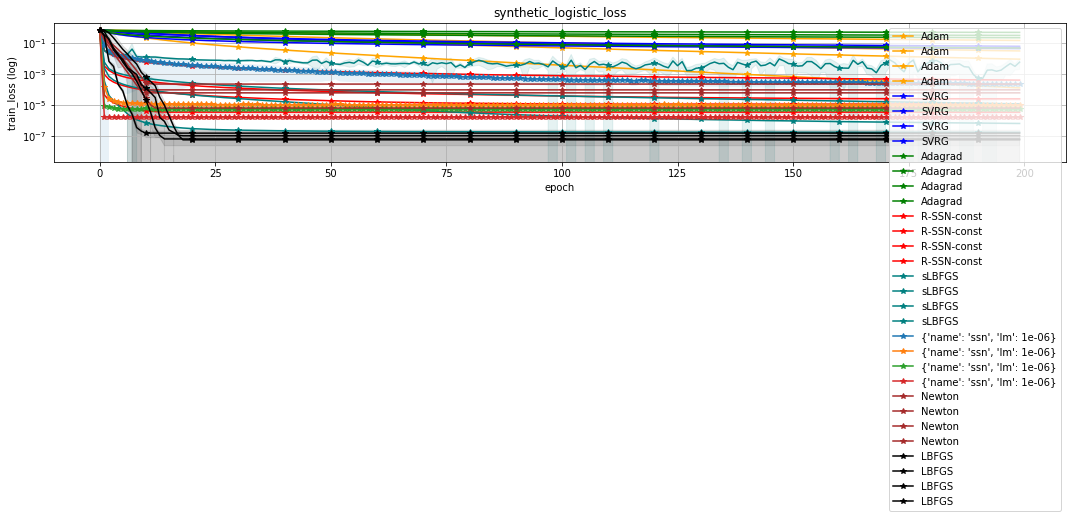

In [37]:
# Figure 2 - mushrooms logistic
from haven import haven_results as hr
savedir_base='/mnt/datasets/public/issam/prototypes/ssn/borgy/'

# loss_func = 'squared_hinge_loss'
for exp_group in [
    "syn_logistic",
#     "syn_squared_hinge",
#     'ijcnn_grid_search'
#     'ssn_const',
#      "rcv1_squared_hinge",
#      "rcv1_logistic",
#     'ijcnn_squared_hinge',
#     'ijcnn_logistic',
#                   'mushrooms_logistic',  
#     'mushrooms_squared_hinge'
                 ]:
    rm = hr.ResultManager(savedir_base=savedir_base,
                              workdir='/home/issam/Research_Ground/ssn',
                              exp_group_list=[
                                  exp_group 
                              ],
                              groupby_list=['dataset', 'margin', 'loss_func'],
                                  verbose=0)
#     display(rm.get_exp_list_df()[0])
#     fig_list = rm.get_plot_all(y_metric_list=['train_loss'], 
#                                    order='metrics_by_groups',
#                                    x_metric='epoch', 
#                                    figsize=(15,6),
#                                    log_metric_list=['train_loss'],
#                                    map_exp_list=map_exp_list,
#                                    title_list=['dataset','loss_func'],
#                                    legend_list=['opt'], 
#     #                            avg_across='runs'
#                               ) 
    fig_list = rm.get_plot_all(y_metric_list=['train_loss'], 
                                   order='metrics_by_groups',
                                   x_metric='epoch', 
                                   figsize=(15,6),
                                   log_metric_list=['train_loss'],
                                   map_exp_list=map_exp_list,
                                   title_list=['dataset', 'margin', 'loss_func'],
                                   legend_list=['opt'], 
                               avg_across='runs'
                              ) 
#     fig_list = rm.get_plot_all(y_metric_list=['train_epoch_time'], 
#                                order='metrics_by_groups',
#                                x_metric='epoch', 
#                                figsize=(30,6),
#                                log_metric_list=['train_loss'],
#                                map_exp_list=map_exp_list,
#                                title_list=['dataset', 'loss_func'],
#                                legend_list=['opt'], 
# #                            avg_across='runs',
#                            mode='bar',
#                            bar_agg='mean'
#                           ) 


    rm.get_job_stats()

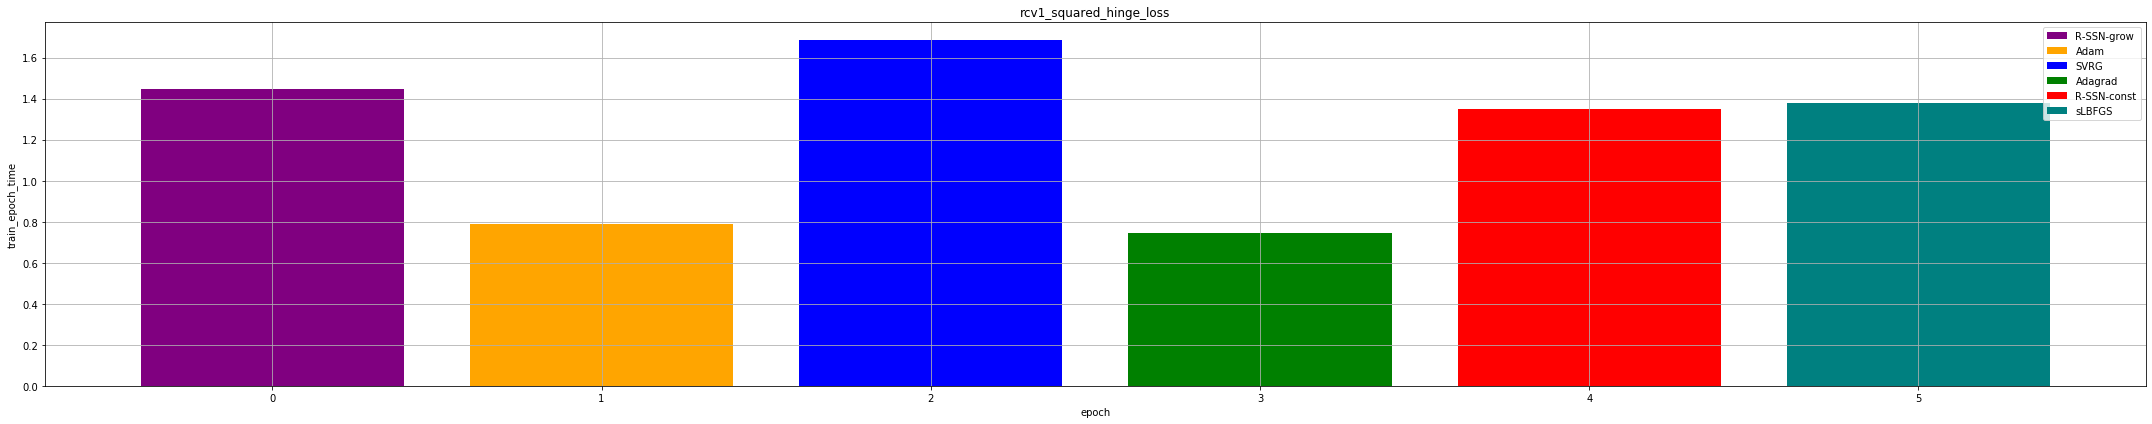

In [23]:
fig_list = rm.get_plot_all(y_metric_list=['train_epoch_time'], 
                               order='metrics_by_groups',
                               x_metric='epoch', 
                               figsize=(30,6),
                               log_metric_list=['train_loss'],
                               map_exp_list=map_exp_list,
                               title_list=['dataset', 'loss_func'],
                               legend_list=['opt'], 
                           avg_across='runs',
                           mode='bar',
                           bar_agg='mean'
                          ) 

In [ ]:
# kernels_basic

In [ ]:
# kernels_grow

In [6]:
import sys
from importlib import reload
!{sys.executable} -m pip install --upgrade  --no-dependencies '/home/issam/Research_Ground/haven/' --user

reload(hr)

Processing /home/issam/Research_Ground/haven
  Created wheel for havenai: filename=havenai-0.5.0-cp37-none-any.whl size=24694 sha256=3336c577d793273a02c56c18a2163e7960b91bf6d5d3bbd13b0144e6fd8450ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxg18dxk/wheels/a7/ce/67/5d7012be13e42989ac0566940e2528ab36067bfedbe3a8b8cb
Successfully built havenai
  Found existing installation: havenai 0.5.0
    Uninstalling havenai-0.5.0:
      Successfully uninstalled havenai-0.5.0


<module 'haven.haven_results' from '/mnt/home/issam/.local/lib/python3.7/site-packages/haven/haven_results.py'>